# Лабораторная работа №7. Численное решение задачи Коши для систем обыкновенных дифференциальных уравнений
## Бегунов Никита
## А-13б-20
### Вариант 41

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Задача 1
**Задание:** Найти приближенное решение задачи Коши из таблицы с точностью $\varepsilon = 10^{-6}$.  
$f(t, y) = -25y + 5t^2sint - t^2 + 5$, $t_0 = 0$, $T = 3$, $y_0 = 3$  
1. Найти решение задачи Коши с фиксированным шагом $h = 0.01$ методом Эйлера и методом индивидуального варианта (задача 6.2 - Усовершенствованный метод Эйлера)

In [2]:
def f(t, y):
    return -25*y + 5*t**2*np.sin(t) - t**2 + 5

In [3]:
def SolveEulerMethodForh(f, y_0, t_0, T, h):
    n = math.ceil((T - t_0) / h)
    t = np.linspace(t_0, T, n+1)
    h = (T - t_0) / n
    y = [y_0]
    for i in range(1, len(t)):
        y.append(y[i-1] + h * f(t[i-1], y[i-1]))
    return t, y

In [4]:
def SolveModEulerMethodForh(f, y_0, t_0, T, h):
    n = math.ceil((T - t_0) / h)
    t = np.linspace(t_0, T, n+1)
    h = (T - t_0) / n
    y = [y_0]
    for i in range(1, len(t)):
        y.append(y[i-1] + h * f(t[i-1] + h/2, y[i-1] + h/2 * f(t[i-1], y[i-1])))
    return t, y

In [21]:
t_0 = 0
T = 3
y_0 = 3
h = 0.05

t1, y1 = SolveEulerMethodForh(f, y_0, t_0, T, h)
t2, y2 = SolveModEulerMethodForh(f, y_0, t_0, T, h)

2. Построить графики полученных решений задачи.

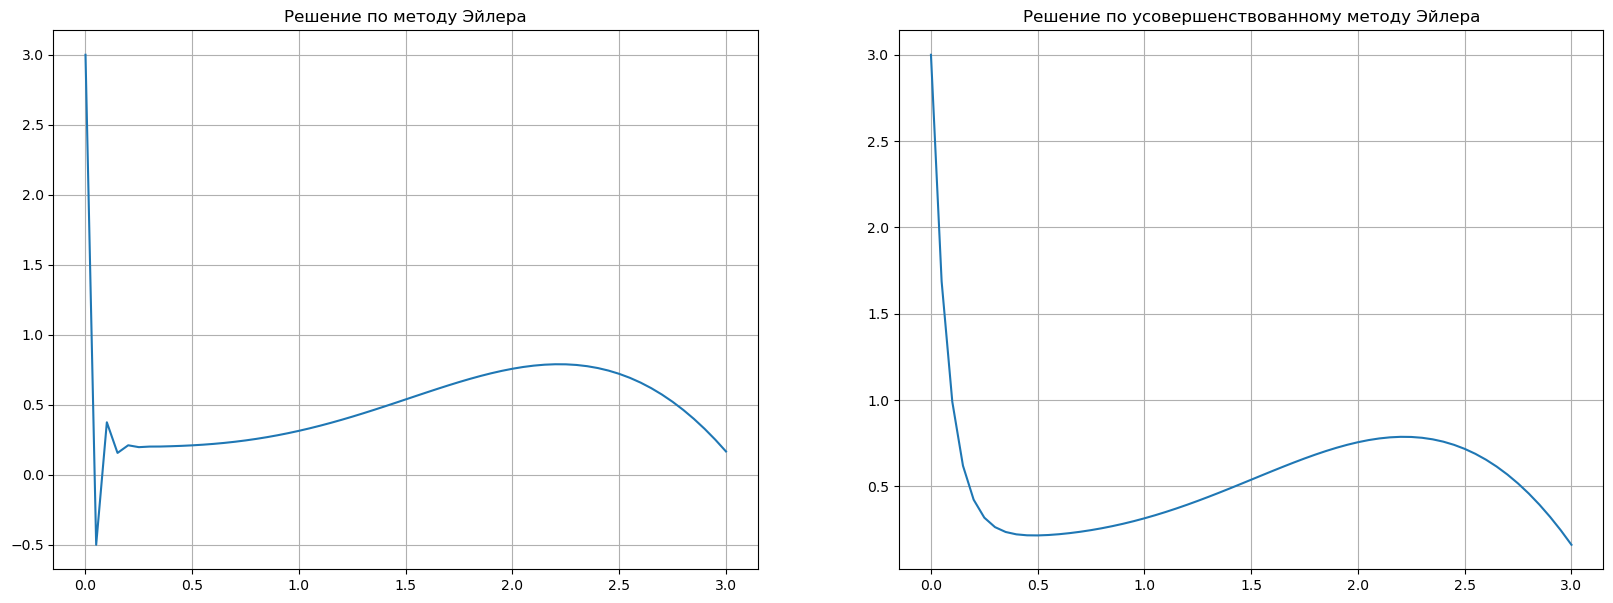

In [22]:
fig, axs = plt.subplots(1, 2, figsize = (20,7))
axs[0].set_title('Решение по методу Эйлера')
axs[0].plot(t1, y1)
axs[0].grid()
axs[1].set_title('Решение по усовершенствованному методу Эйлера')
axs[1].plot(t2, y2)
axs[1].grid()

3. Найти решение той же задачи с заданной точностью. Построить графики решения и сравнить с пунктом 2.

In [7]:
def SolveModEulerMethod(f, y_0, t_0, T, eps):
    def DoStep(h):
        n = math.ceil((T - t_0) / h)
        t = np.linspace(t_0, T, n+1)
        h = (T - t_0) / n
        y = [y_0]
        for i in range(1, len(t)):
            y.append(y[i-1] + h * f(t[i-1] + h/2, y[i-1] + h/2 * f(t[i-1], y[i-1])))
        return h, t, y
    
    def GetError(y, y_new):
        r = []
        for i in range(len(y)):
            r.append(np.abs(y[i] - y_new[2*i]) / 3)
        return np.array(r)
    
    h = 0.1
    h, t, y = DoStep(h)
    h, t, y_new = DoStep(h/2)
    r = GetError(y, y_new)
    while r.max() > eps:
        y = y_new
        h, t, y_new = DoStep(h/2)
        r = GetError(y, y_new)
    return t, y_new, len(t), h

Число точек N для достижения точности:  61441
Шаг h для достожения точности:          4.8828125e-05


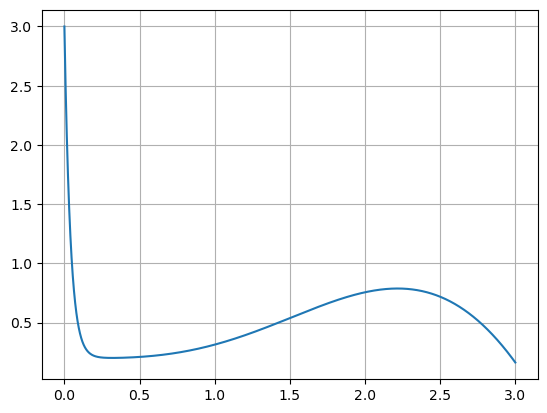

In [8]:
t_0 = 0
T = 3
y_0 = 3
eps = 10**(-6)

t, y, n, h = SolveModEulerMethod(f, y_0, t_0, T, eps)
print('Число точек N для достижения точности: ', n)
print('Шаг h для достожения точности:         ', h)
plt.plot(t, y)
plt.grid()

## Задача 2
**Задание:** Дана задача Коши для двух систем обыкновенных дифференциальных уравнений с постоянными коэффициентами.  
$$
Y'(t) = AY(t), Y(0) = Y_0, \\
Z'(t) = BZ(t), Z(0) = Z_0, 
$$
где $A$ и $B$ - заданные матрицы, $Y_0$ и $Z_0$ - заданные векторы. Исследовать поведение решения систем уравнений.

In [9]:
A = np.array([[-116.967,   38.887, -110.397],
              [ -52.101, -102.573,  275.23 ],
              [ 104.81 , -277.406, -100.46 ]])

Y_0 = np.array([4.4, 3.2, 5.2])

B = np.array([[-47.173,  40.843,  27.459],
              [ 34.392, -81.93 ,  26.961],
              [ 35.24 ,  14.016, -86.897]])

Z_0 = np.array([4, 3.6, 4.8])

1. Используя встроенную функцию для нахождения собственных чисел мариц $A$ и $B$, найти коэффициенты жесткости обоих систем. Установить, какая задача является жесткой.

In [10]:
lambdaA = np.linalg.eigvals(A)
print('Собственные числа в матрице A:')
for num in lambdaA:
    print(num)
print('Коэффициент жесткости A:', abs(lambdaA.real).max() / abs(lambdaA.real).min())
print()

lambdaB = np.linalg.eigvals(B)
print('Собственные числа в матрице B:')
for num in lambdaB:
    print(num)
print('Коэффициент жесткости B:', abs(lambdaB.real).max() / abs(lambdaB.real).min())

Собственные числа в матрице A:
(-119.99976720678357+0j)
(-100.00011639660816+299.99975728686223j)
(-100.00011639660816-299.99975728686223j)
Коэффициент жесткости A: 1.1999962753128732

Собственные числа в матрице B:
(-5.817667693902552+0j)
(-105.09116615304877+8.149240523265515j)
(-105.09116615304877-8.149240523265515j)
Коэффициент жесткости B: 18.064140422319745


2. Составить программу-функцию нахождения решения системы ОДУ 1 порядка с постоянными коэффициентами по явному методу Эйлера.

In [11]:
def YToNumpyArray(Y):
    for i in range(len(Y)):
        Y[i] = np.array(Y[i])
    return np.array(Y)

In [12]:
def SolveEulersMethodODU(A, Y_0, h, t_0, T):
    n = math.ceil((T - t_0) / h)
    h = (T - t_0) / n
    t = np.linspace(t_0, T, n + 1)
    Y = [Y_0]
    for i in range(n):
        Y_0 = Y[i]
        Y.append(Y_0 + h * A.dot(Y_0))
    return t, YToNumpyArray(Y)

3. Численно решить обе задачи на отрезке $[0, 1]$ с шагом $h = 0.01$ явным методом Эйлера. Определить, для какой из задач явный метод неустойчив при данном шаге $h$.

In [13]:
def Plot(t, Y):
    size = len(Y[0])
    Y_plot = []
    for i in range(size):
        Y_plot.append(Y[:, i])
    fig, axs = plt.subplots(1, size, figsize = (20,5))
    for i in range(size):
        axs[i].plot(t, Y_plot[i])
        axs[i].grid

In [14]:
t_0 = 0
T = 1
h = 0.01

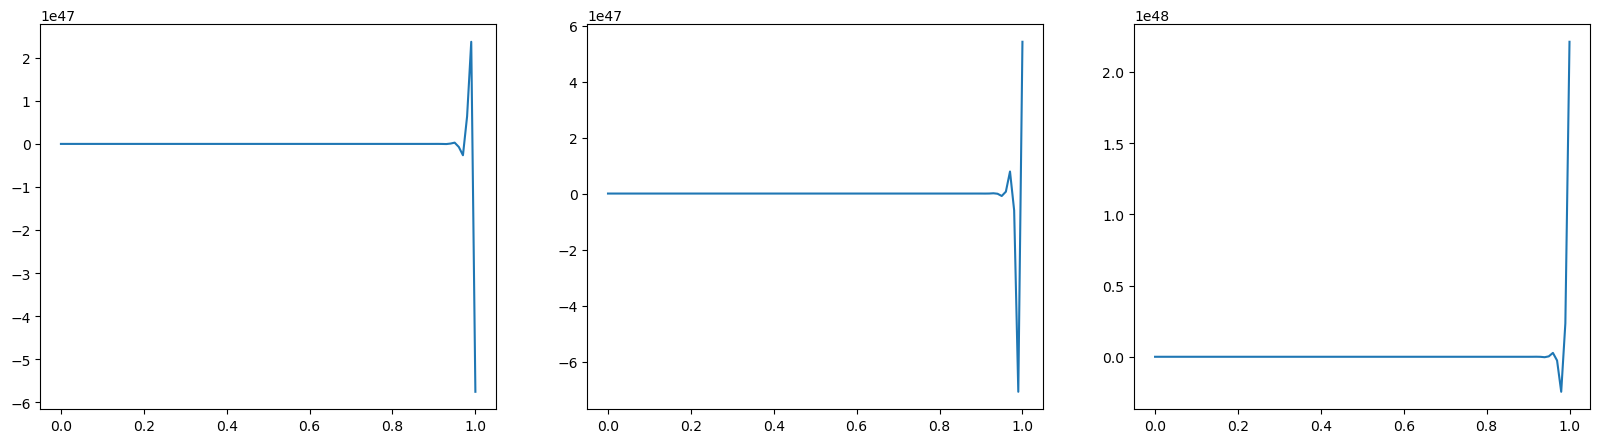

In [15]:
t, Y = SolveEulersMethodODU(A, Y_0, h, t_0, T)
Plot(t, Y)

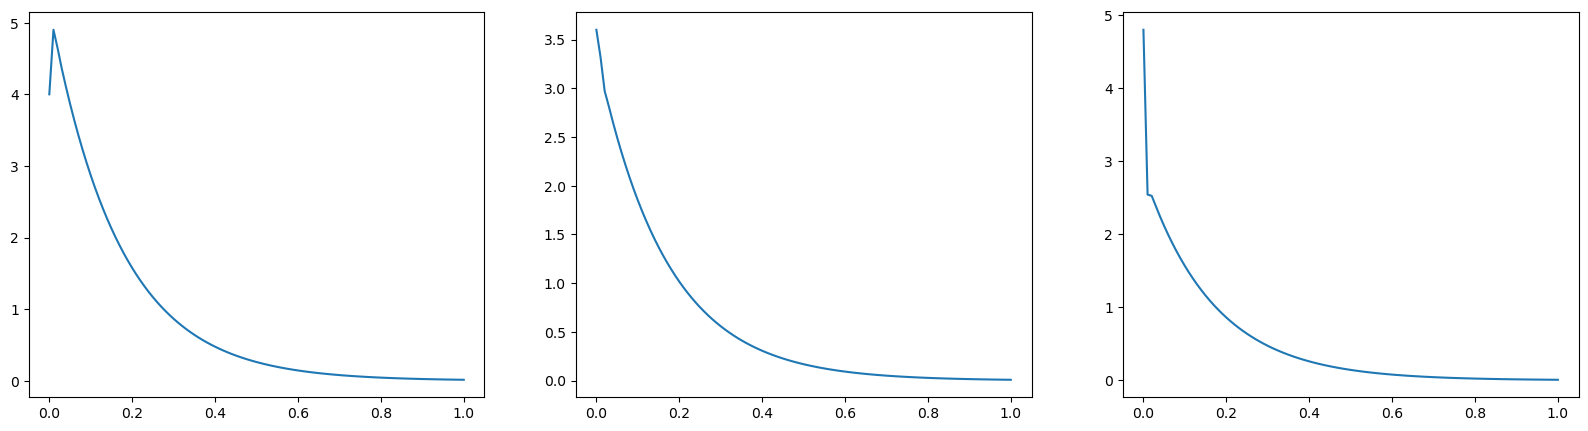

In [16]:
t, Z = SolveEulersMethodODU(B, Z_0, h, t_0, T)
Plot(t, Z)

4. Составить программу-функцию нахождения решения системы ОДУ 1 порядка с постоянными коэффициентами по неявному методу Эйлера. Используя составленную программу, найти решение жесткой задачи с шагом $h = 0.01$. Построить графики компонент полученного решения.

In [17]:
def SolveImplicitEulersMethodODUForh(A, Y_0, h, t_0, T):
    n = math.ceil((T - t_0) / h)
    h = (T - t_0) / n
    t = np.linspace(t_0, T, n+1)
    M = np.linalg.inv(np.eye(len(A)) - h*A)
    Y = [Y_0]
    for i in range(n):
        Y_0 = Y[i]
        Y.append(M.dot(Y_0))
    return t, YToNumpyArray(Y)

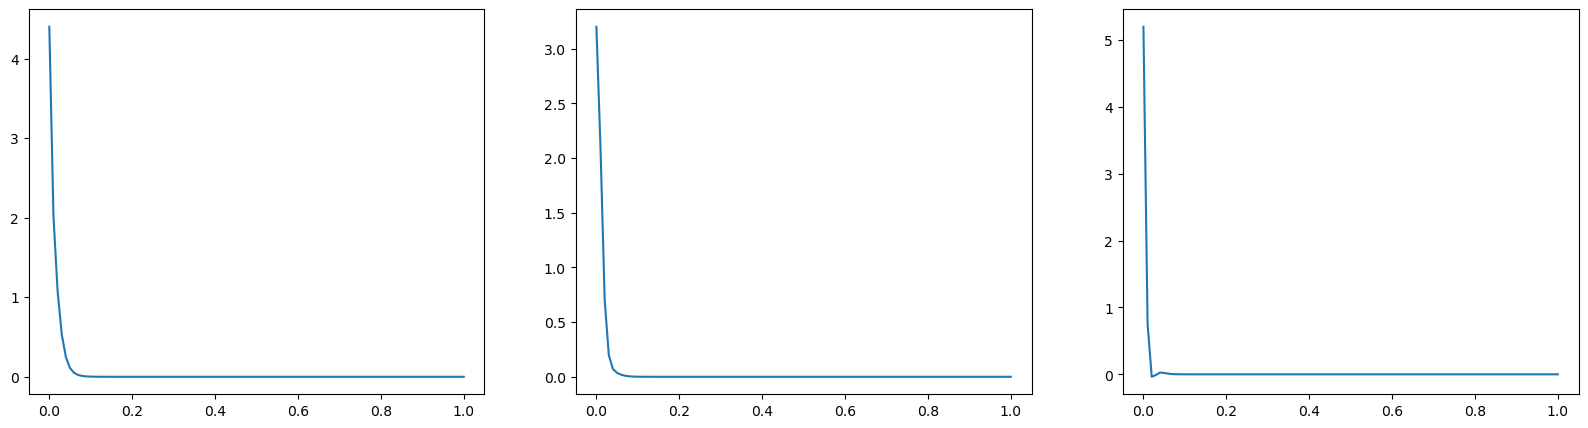

In [18]:
h = 0.01
t, Y = SolveImplicitEulersMethodODUForh(A, Y_0, h, t_0, T)
Plot(t, Y)

5. Найти решение жесткой задачи с заданой точностью $\varepsilon = 10^{-6}$. Построить графики компонент решения и сравнить с пунктом 4.

In [19]:
def SolveImplicitEulersMethodODU(A, Y_0, t_0, T, eps):
    def DoStep(Y_0, h):
        n = math.ceil((T - t_0) / h)
        h = (T - t_0) / n
        t = np.linspace(t_0, T, n+1)
        M = np.linalg.inv(np.eye(len(A)) - h*A)
        Y = [Y_0]
        for i in range(n):
            Y_0 = Y[i]
            Y.append(M.dot(Y_0))
        return h, t, Y
    
    def GetError(Y, Y_new):
        size = len(Y[0])
        r = []
        for i in range(size):
            r.append([])
        for i in range(len(Y)):
            for j in range(size):
                r[j].append(np.abs(Y[i][j] - Y_new[2*i][j]))
        
        for i in range(size):
            r[i] = max(r[i])
        error = max(r)
        return error
    
    h = 0.1
    h, t, Y = DoStep(Y_0, h)
    h, t, Y_new = DoStep(Y_0, h/2)
    r = GetError(Y, Y_new)
    while r > eps:
        Y = Y_new
        h, t, Y_new = DoStep(Y_0, h/2)
        r = GetError(Y, Y_new)
    
    return t, YToNumpyArray(Y_new), len(t), h

Число точек N для достижения точности:  1310721
Шаг h для достожения точности:          7.62939453125e-07


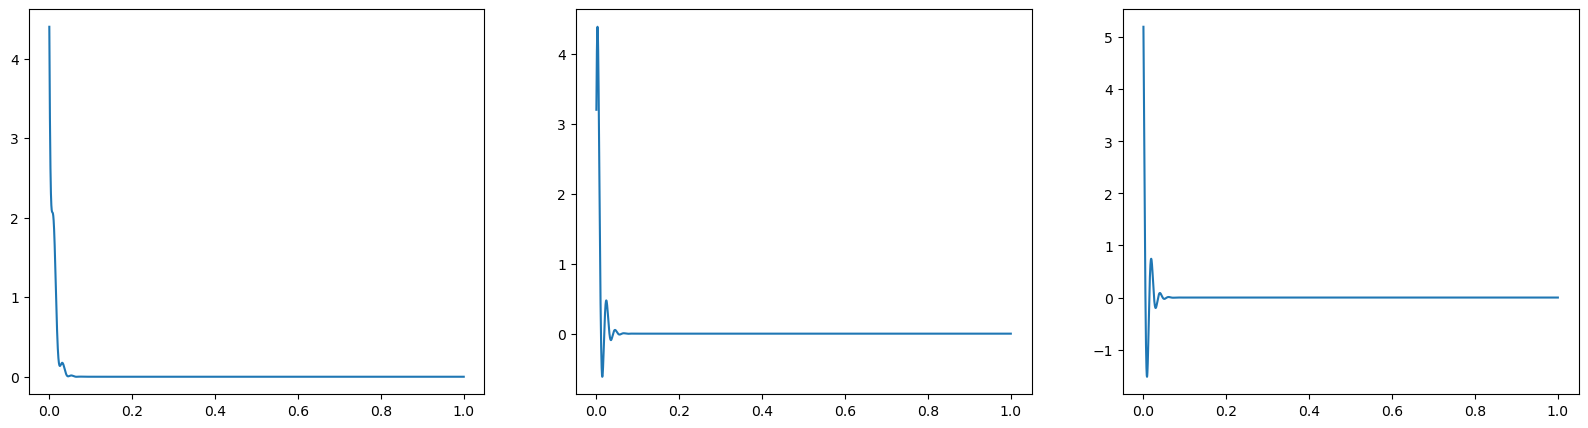

In [20]:
eps = 10**(-3)
t, Y, n, h = SolveImplicitEulersMethodODU(A, Y_0, t_0, T, eps)
print('Число точек N для достижения точности: ', n)
print('Шаг h для достожения точности:         ', h)
Plot(t, Y)